In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_csv('CreditRisk-1.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


In [4]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
df=df.dropna()

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            499 non-null    object 
 1   Gender             499 non-null    object 
 2   Married            499 non-null    object 
 3   Dependents         499 non-null    object 
 4   Education          499 non-null    object 
 5   Self_Employed      499 non-null    object 
 6   ApplicantIncome    499 non-null    int64  
 7   CoapplicantIncome  499 non-null    float64
 8   LoanAmount         499 non-null    int64  
 9   Loan_Amount_Term   499 non-null    float64
 10  Credit_History     499 non-null    float64
 11  Property_Area      499 non-null    object 
 12  Loan_Status        499 non-null    int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 54.6+ KB


<AxesSubplot:>

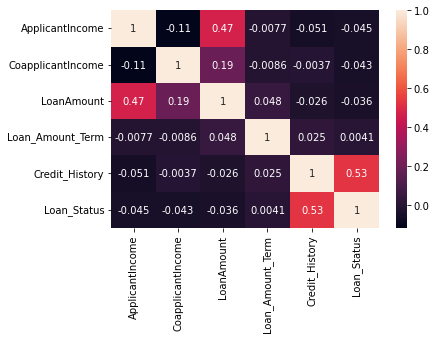

In [8]:
sns.heatmap(df.corr(),annot=True)

In [9]:
df.Loan_Status=df.Loan_Status.astype('category')
df.Credit_History=df.Credit_History.astype('category')

In [10]:
x=df.drop(['Loan_Status','Loan_ID'],axis=1)
y=df.Loan_Status

In [11]:
x=pd.get_dummies(x,drop_first=True)

In [12]:
x

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,0,360.0,1,0,0,0,0,0,0,1,0,1
1,4583,1508.0,128,360.0,1,1,1,0,0,0,0,1,0,0
2,3000,0.0,66,360.0,1,1,0,0,0,0,1,1,0,1
3,2583,2358.0,120,360.0,1,1,0,0,0,1,0,1,0,1
4,6000,0.0,141,360.0,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71,360.0,0,0,0,0,0,0,0,1,0,0
610,4106,0.0,40,180.0,1,1,0,0,1,0,0,1,0,0
611,8072,240.0,253,360.0,1,1,1,0,0,0,0,1,0,1
612,7583,0.0,187,360.0,1,1,0,1,0,0,0,1,0,1


In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30)

In [14]:
model=LogisticRegression()

In [15]:
model.fit(x_train,y_train)

LogisticRegression()

In [16]:
model.score(x_train,y_train)

0.8166189111747851

In [17]:
model.score(x_test,y_test)

0.8066666666666666

In [18]:
train_pred=model.predict(x_train)

In [19]:
test_pred=model.predict(x_test)

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
accuracy_score(y_train,train_pred)

0.8166189111747851

In [32]:
accuracy_score(y_test,test_pred)

0.8066666666666666

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
cm=confusion_matrix(y_test,test_pred)

In [35]:
cm

array([[25, 27],
       [ 2, 96]], dtype=int64)

<AxesSubplot:>

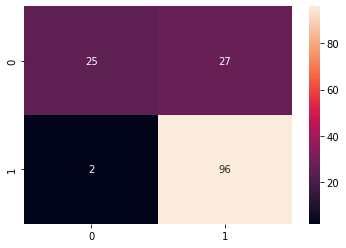

In [37]:
sns.heatmap(cm,annot=True)